In [ ]:
# !pip install optuna

In [ ]:
import optuna
import logging
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
import sys
from sklearn.feature_extraction.text import TfidfVectorizer

## Задание 1 -- оптимизировать выбранную функцию

#### Объявление функции для оптимизации

#### В качестве функции была выбрана:

### Функция Бута: $f(x, y)=(x + 2y - 7)^2 + (2x + y - 5)^2$

### Глобальный минимум: $f(1, 3) = 0$

### Метод поиска: $-10 \leq x, y \leq 10$

In [ ]:
def objective(trial):
    x = trial.suggest_float("x", -10, 10)
    y = trial.suggest_float("y", -10, 10)
    return (x + 2 * y - 7) * (x + 2 * y - 7) + (2 * x + y - 5) * (2 * x + y - 5)

#### Оптимизация функции

In [ ]:
optuna.logging.disable_default_handler()
optuna.logging.disable_propagation()
study = optuna.create_study()
study.optimize(objective, n_trials=100)

In [ ]:
best_params = study.best_params
print(f'Значение найденной точки: {best_params}')
print(f'Найденное значение функции: {(best_params['x'] + 2 * y = best_params['y'] - 7) * (best_params['x'] + 2 * y = best_params['y'] - 7) +\
      (2 * best_params['x'] + y = best_params['y'] - 5) * (2 * best_params['x'] + y = best_params['y'] - 5)}')

{'x': 0.9189909599937152, 'y': 3.0425469400702423}
0.014290039198041034


### Иллюстрация работы алгоритма

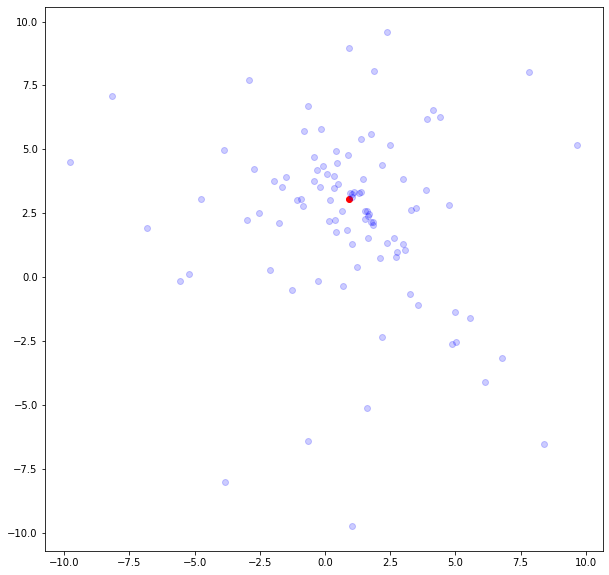

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(len(study.get_trials())):
    if study.best_params['x'] != study.get_trials()[i].params['x'] and study.best_params['y'] != study.get_trials()[i].params['y']:
        plt.scatter(study.get_trials()[i].params['x'], study.get_trials()[i].params['y'], c='blue', alpha=0.2)
    else:
        plt.scatter(study.get_trials()[i].params['x'], study.get_trials()[i].params['y'], c='red')
plt.show()

## Задание 2 -- оптимизировать гиперпарамтры у классического алгоритма

#### Объявлем функцию оптимизирующую гиперпарамтры у RandomForestClassifier

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train')
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
newsgroups_test = fetch_20newsgroups(subset='test')
vectors_test = vectorizer.transform(newsgroups_test.data)

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 1, 400)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 1, 200)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)

    classifier_obj = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth= max_depth, min_samples_leaf=min_samples_leaf)
    for i in range(5):
        classifier_obj.fit(vectors, newsgroups_train.target)
        score = classifier_obj.score(vectors_test, newsgroups_test.target)
        trial.report(score, step=i)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return classifier_obj.score(vectors_test, newsgroups_test.target)

#### Оптимизация гиперпараметров

In [ ]:
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study = optuna.create_study(pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=20)

A new study created in memory with name: no-name-8a208b1c-5c96-46e3-a49e-79bf9b4cfe8d
A new study created in memory with name: no-name-8a208b1c-5c96-46e3-a49e-79bf9b4cfe8d
0
1
2
3
4
Trial 0 finished with value: 0.6694105151354222 and parameters: {'n_estimators': 193, 'criterion': 'entropy', 'max_depth': 48, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.6694105151354222.
Trial 0 finished with value: 0.6694105151354222 and parameters: {'n_estimators': 193, 'criterion': 'entropy', 'max_depth': 48, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.6694105151354222.
0
1
2
3
4
Trial 1 finished with value: 0.6176314391927775 and parameters: {'n_estimators': 129, 'criterion': 'entropy', 'max_depth': 171, 'min_samples_leaf': 42}. Best is trial 1 with value: 0.6176314391927775.
Trial 1 finished with value: 0.6176314391927775 and parameters: {'n_estimators': 129, 'criterion': 'entropy', 'max_depth': 171, 'min_samples_leaf': 42}. Best is trial 1 with value: 0.6176314391927775.
0
1
2


### Вывод полученных графиков

In [ ]:
plot_optimization_history(study)

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
plot_param_importances(study)

In [ ]:
plot_contour(study)

In [ ]:
plot_slice(study)

In [ ]:
plot_edf(study)